Iteration: 1, Num colors used: 129, Conflict: 202
Iteration: 2, Num colors used: 130, Conflict: 200
Iteration: 3, Num colors used: 131, Conflict: 196
Iteration: 4, Num colors used: 131, Conflict: 196
Iteration: 5, Num colors used: 131, Conflict: 196
Iteration: 6, Num colors used: 131, Conflict: 196
Iteration: 7, Num colors used: 131, Conflict: 196
Iteration: 8, Num colors used: 131, Conflict: 196
Iteration: 9, Num colors used: 132, Conflict: 192
Iteration: 10, Num colors used: 133, Conflict: 190
Iteration: 11, Num colors used: 134, Conflict: 182
Iteration: 12, Num colors used: 134, Conflict: 182
Iteration: 13, Num colors used: 134, Conflict: 182
Iteration: 14, Num colors used: 135, Conflict: 180
Iteration: 15, Num colors used: 136, Conflict: 178
Iteration: 16, Num colors used: 137, Conflict: 174
Iteration: 17, Num colors used: 137, Conflict: 174
Iteration: 18, Num colors used: 137, Conflict: 174
Iteration: 19, Num colors used: 137, Conflict: 174
Iteration: 20, Num colors used: 137, Con

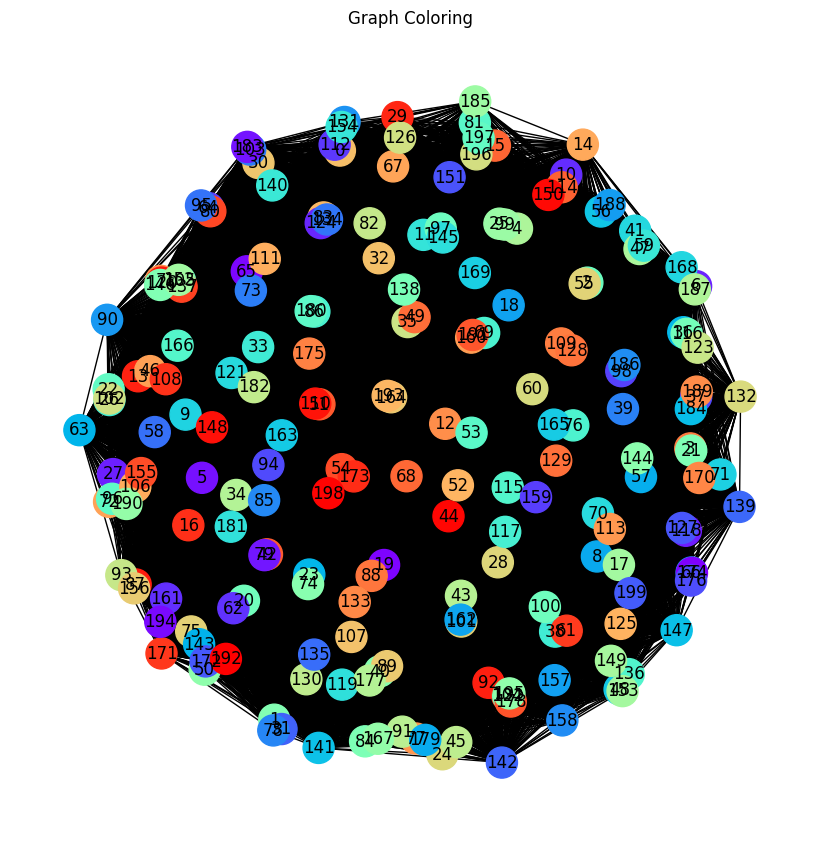

({0: 146,
  1: 101,
  2: 91,
  3: 167,
  4: 117,
  5: 4,
  6: 9,
  7: 160,
  8: 46,
  9: 62,
  10: 11,
  11: 70,
  12: 161,
  13: 190,
  14: 153,
  15: 173,
  16: 187,
  17: 113,
  18: 44,
  19: 1,
  20: 94,
  21: 99,
  22: 88,
  23: 51,
  24: 135,
  25: 109,
  26: 76,
  27: 8,
  28: 136,
  29: 189,
  30: 143,
  31: 25,
  32: 145,
  33: 74,
  34: 119,
  35: 129,
  36: 52,
  37: 18,
  38: 75,
  39: 34,
  40: 102,
  41: 64,
  42: 175,
  43: 121,
  44: 197,
  45: 123,
  46: 156,
  47: 116,
  48: 57,
  49: 171,
  50: 105,
  51: 176,
  52: 149,
  53: 85,
  54: 180,
  55: 137,
  56: 56,
  57: 48,
  58: 29,
  59: 72,
  60: 133,
  61: 184,
  62: 13,
  63: 50,
  64: 15,
  65: 2,
  66: 40,
  67: 154,
  68: 172,
  69: 79,
  70: 66,
  71: 61,
  72: 155,
  73: 33,
  74: 103,
  75: 138,
  76: 80,
  77: 159,
  78: 35,
  79: 6,
  80: 181,
  81: 84,
  82: 126,
  83: 147,
  84: 98,
  85: 36,
  86: 78,
  87: 192,
  88: 168,
  89: 141,
  90: 41,
  91: 122,
  92: 191,
  93: 127,
  94: 19,
  95: 30,
  96: 8

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

def is_feasible(solution, graph):
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            if solution[node] == solution[neighbor]:
                return False
    return True

def calc_solution_value(solution, graph):
    conflicts = 0
    for node in graph.nodes:
        for neighbor in graph.neighbors(node):
            if solution[node] == solution[neighbor]:
                conflicts += 1
    return conflicts

def initialize(graph):
    num_colors = len(graph)  # Broj čvorova u grafu
    colors = list(range(num_colors))
    return {node: random.choice(colors) for node in graph}

def make_small_change(solution, graph):
    new_solution = deepcopy(solution)
    node = random.choice(list(graph.nodes))
    neighbor_colors = set(new_solution[neighbor] for neighbor in graph.neighbors(node))
    available_colors = [color for color in range(len(graph)) if color not in neighbor_colors]
    # Umesto nasumičnog odabira, odaberite boju koja minimizuje broj konflikata
    best_color = None
    min_conflicts = float('inf')
    for color in available_colors:
        new_solution[node] = color
        conflicts = calc_solution_value(new_solution, graph)
        if conflicts < min_conflicts:
            min_conflicts = conflicts
            best_color = color
    new_solution[node] = best_color
    return new_solution


def simulated_annealing(graph, num_iters, cooling_rate):
    solution = initialize(graph)
    value = calc_solution_value(solution, graph)
    best_solution = deepcopy(solution)
    best_value = value
    
    values = [None for _ in range(num_iters)]
    for i in range(1, num_iters + 1):
        new_solution = make_small_change(solution, graph)
        new_value = calc_solution_value(new_solution, graph)
        delta_E = new_value - value
        
        if delta_E < 0 or random.random() < pow(2.7, -delta_E / i):
            value = new_value
            solution = deepcopy(new_solution)
            # Ažuriraj najbolje rešenje ako nova vrednost konflikta nije gora od trenutne
            if new_value <= best_value:
                best_value = new_value
                best_solution = deepcopy(new_solution)
        
        values[i - 1] = value

        num_colors_used = len(set(best_solution.values()))
        print(f"Iteration: {i}, Num colors used: {num_colors_used}, Conflict: {value}")

    print("Best Solution:")
    for node in graph.nodes:
        color = best_solution[node]
        print(f"Node {node}: Color {color}")
    print("Best Conflict:", best_value)

    num_colors_used = len(set(best_solution.values()))
    print("Number of colors used:", num_colors_used)

    plt.figure(figsize=(8, 8))
    nx.draw(graph, node_color=[best_solution[node] for node in graph.nodes], cmap=plt.cm.rainbow, with_labels=True, node_size=500)
    plt.title('Graph Coloring')
    plt.show()

    return best_solution, best_value



graph = nx.complete_graph(200)

num_iters = 1000
cooling_rate = 0.002

simulated_annealing(graph, num_iters, cooling_rate)